# Определение стоимости автомобилей

## Подготовка данных

In [143]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
state = 12345

In [144]:
data = pd.read_csv('/datasets/autos.csv')
data

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


Приведем все столбцы к нижнему регистру:

In [145]:
data.columns = data.columns.str.lower()
data

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,kilometer,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


In [146]:
display(data.info())
display(data.describe())
display('Пропуски:', data.isna().sum())
display('Дубликаты:', data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   datecrawled        354369 non-null  object
 1   price              354369 non-null  int64 
 2   vehicletype        316879 non-null  object
 3   registrationyear   354369 non-null  int64 
 4   gearbox            334536 non-null  object
 5   power              354369 non-null  int64 
 6   model              334664 non-null  object
 7   kilometer          354369 non-null  int64 
 8   registrationmonth  354369 non-null  int64 
 9   fueltype           321474 non-null  object
 10  brand              354369 non-null  object
 11  notrepaired        283215 non-null  object
 12  datecreated        354369 non-null  object
 13  numberofpictures   354369 non-null  int64 
 14  postalcode         354369 non-null  int64 
 15  lastseen           354369 non-null  object
dtypes: int64(7), object(

None

,price,registrationyear,power,kilometer,registrationmonth,numberofpictures,postalcode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


'Пропуски:'

datecrawled              0
price                    0
vehicletype          37490
registrationyear         0
gearbox              19833
power                    0
model                19705
kilometer                0
registrationmonth        0
fueltype             32895
brand                    0
notrepaired          71154
datecreated              0
numberofpictures         0
postalcode               0
lastseen                 0
dtype: int64

'Дубликаты:'

4

Сделаем корреляционную матрицу до предобработки данных:

<AxesSubplot:>

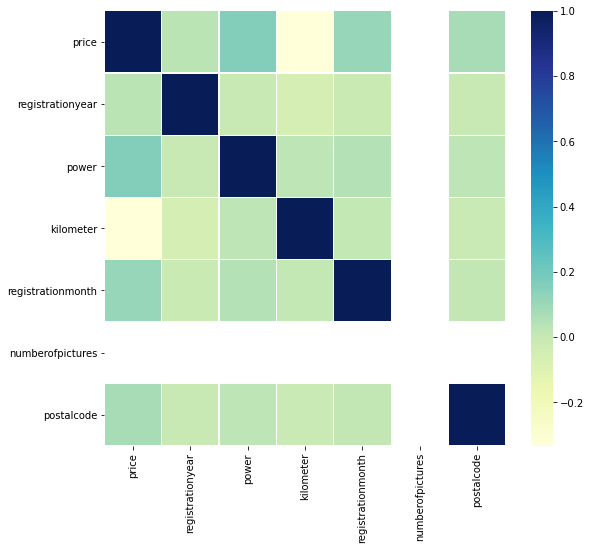

In [147]:
corrmat = data.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

### Вывод:

- Информация о структуре данных - двумерная(DataFrame);
- таблица имеет 354369 строк и 16 столбцов; 
- присутствуют названия столбцов и количество ненулевых значений;
- в таблице присутствуют значения типов object(9 столбцов), int(7 столбцов);
- использование памяти.

Пропуски наблюдаются в 5-ти столбцах, далее в предобработке данных будем заполнять пропуски по мере необходимости.
Присутствует 4 дубликата.

### Преобработка данных:

Столбцы "datecrawled", "datecreated", "registrationmonth" и "lastseen" можно удалить, так как они не понадобятся нам для дальнейшего анализа.

In [148]:
data = data.drop(['datecrawled', 'datecreated', 'lastseen', 'registrationmonth'], axis=1)

Заметно, что в столбце "numberofpictures" только нули, поэтому данный столбец также можно удалить:

In [149]:
data = data.drop('numberofpictures', axis=1)

В столбце "price" присутствуют аномалии, удалим эти строки:

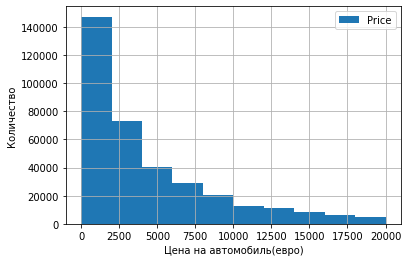

In [150]:
data['price'].hist()

plt.legend(['Price'])
plt.xlabel('Цена на автомобиль(евро)')
plt.ylabel('Количество')
plt.show()

In [151]:
data_price = data[data['price']< 4000]['price'].index
print('Удалим', data_price.shape, 'строк')

Удалим (220053,) строк


In [152]:
data = data.drop(data_price)

На данном этапе в столбце "notrepaired" присутствует 65866 пропусков, это видно ниже и далее заполним их "unknown":

In [153]:
print('Количество пропусков:', data['notrepaired'].isna().sum())

Количество пропусков: 14311


In [154]:
data['notrepaired'] = data['notrepaired'].fillna('unknown')

Посмотрев данные, увидела что в столбце "registrationyear" есть несуществующие года регистрации автомобиля(точнее присутствуют выбросы):

In [155]:
data['registrationyear'].unique()

array([2011, 2004, 2014, 2007, 2009, 2017, 2008, 2002, 2006, 2012, 2005,
       2010, 2013, 1996, 2003, 2015, 2000, 1999, 1995, 1997, 1976, 1983,
       2016, 2001, 1981, 1973, 1969, 1971, 2018, 1987, 1991, 1990, 1985,
       1988, 1992, 1980, 1984, 1998, 1986, 1965, 1945, 1994, 1974, 1979,
       1989, 1993, 1955, 1982, 1978, 1972, 1961, 1977, 1966, 1975, 1970,
       1968, 1963, 1967, 1956, 1960, 1941, 8888, 1500, 1964, 1962, 1929,
       1957, 1940, 1949, 9999, 2019, 1937, 1953, 1954, 1958, 1959, 1951,
       2900, 6000, 5911, 4000, 1948, 1952, 8500, 1932, 1000, 5000, 1950,
       1942, 1910, 1935, 1933, 1936, 1923, 1930, 1001, 1944, 7000, 1943,
       1938, 1928, 5555, 1800, 3000, 1931, 4500, 7800, 1947, 1927, 7100])

Сделаем срез данных:

In [156]:
data = data.query('registrationyear > 1970')
data = data.query('registrationyear < 2020')

Также остались столбцы спропусками, такие как: "vehicletype", "gearbox", "model" и "fueltype". Заполним их так: 

In [157]:
data['model'] = data.groupby(['brand'], sort=False)['model'].ffill().bfill()
data['model'].isna().sum()

0

In [158]:
data['vehicletype'] = data.groupby(['brand', 'model'], sort=False)['vehicletype'].ffill().bfill()
data['vehicletype'].isna().sum()

0

In [159]:
data['gearbox'] = data.groupby(['brand', 'model'], sort=False)['gearbox'].ffill().bfill()
data['gearbox'].isna().sum()

0

In [160]:
data['fueltype'] = data.groupby(['brand', 'model'], sort=False)['fueltype'].ffill().bfill()
data['fueltype'].isna().sum()

0

В столбце "power" присутствуют выбросы, сделаем срез данных:

In [161]:
data = data.query('power > 45')
data = data.query('power < 600')

Используем прямое кодирование для преобразования категориальных признаков в численные, а также избегаем дамми-ловушку:

In [162]:
data.describe()

,price,registrationyear,power,kilometer,postalcode
count,127075.000000,127075.000000,127075.000000,127075.000000,127075.000000
mean,9089.302097,2006.843360,147.800071,114637.458194,52774.270187
std,4155.257642,5.655649,57.432197,42626.748170,25812.168747
min,4000.000000,1971.000000,46.000000,5000.000000,1067.000000
25%,5700.000000,2005.000000,105.000000,80000.000000,32289.000000
50%,7950.000000,2007.000000,140.000000,125000.000000,52249.000000
75%,11800.000000,2010.000000,175.000000,150000.000000,73614.000000
max,20000.000000,2019.000000,585.000000,150000.000000,99998.000000


In [163]:
data_ohe = pd.get_dummies(data, drop_first=True)

In [164]:
data.shape

(127075, 11)

Сделаем корреляционную матрицу после предобработки данных:

<AxesSubplot:>

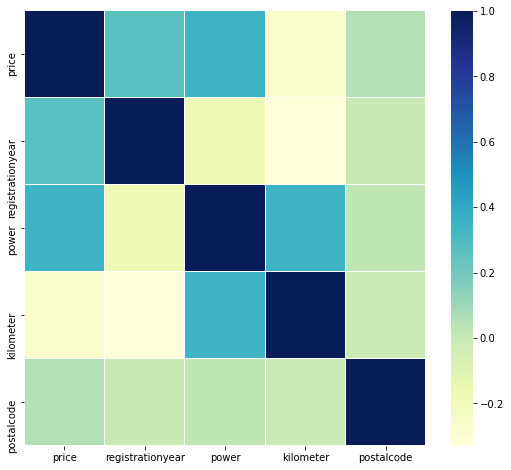

In [165]:
corrmat = data.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

Видим, что взаимосвязь признаков стала лучше.

## Обучение моделей

Разделим выборку на обущающую, валидационную и тестовую:

In [166]:
features = data_ohe.drop(['price'], axis=1) #признаки
target = data_ohe['price'] #целевой признак

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=state)
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train, target_train, test_size=0.2, random_state=state)

display(features_train.shape)
display(target_train.shape)
display(features_valid.shape)
display(target_valid.shape)
display(features_test.shape)
display(target_test.shape)

(81328, 298)

(81328,)

(20332, 298)

(20332,)

(25415, 298)

(25415,)

### LightGBM(LGBMRegressor)

In [167]:
%%time

model_lgbmr = LGBMRegressor()
parametrs = {
        'boosting_type' : ['gbdt'],
        'n_estimators' : range(10, 100, 10),
        'max_depth' : range(1, 16, 2),
        'random_state' : [state],
        'verbose' : [-1],
        'force_row_wise': [True],
        'num_leaves' : [127]}
model_lgbmr_grid = GridSearchCV(model_lgbmr, parametrs, cv=5)
model_lgbmr_grid.fit(features_train, target_train)
pred_lgbmr_valid = model_lgbmr_grid.predict(features_valid)
mse_lgbmr = mean_squared_error(target_valid, pred_lgbmr_valid)
print('Лучшие гиперпараметры для модели: ', model_lgbmr_grid.best_params_)
print('RMSE:',  mse_lgbmr ** 0.5)

Лучшие гиперпараметры для модели:  {'boosting_type': 'gbdt', 'force_row_wise': True, 'max_depth': 15, 'n_estimators': 90, 'num_leaves': 127, 'random_state': 12345, 'verbose': -1}
RMSE: 1911.3549682736077
CPU times: user 16min 8s, sys: 21.9 s, total: 16min 30s
Wall time: 16min 34s


#### Поверка на тестовой выборке:

In [168]:
%%time

pred_lgbmr_test = model_lgbmr_grid.predict(features_test)
mse_lgbmr_test = mean_squared_error(target_test, pred_lgbmr_test)

print('RMSE_TEST:',  mse_lgbmr_test ** 0.5)

RMSE_TEST: 1930.9982922113775
CPU times: user 364 ms, sys: 8.06 ms, total: 372 ms
Wall time: 394 ms


### Дерево решений в регрессии(DecisionTreeRegressor)

In [169]:
%%time

model_tree = DecisionTreeRegressor(random_state=state)
parametrs = {'max_depth': range (1,16, 2)}
model_tree_grid = GridSearchCV(model_tree, parametrs, cv=5)
model_tree_grid.fit(features_train, target_train)
pred_tree_valid = model_tree_grid.predict(features_valid)
mse_tree = mean_squared_error(target_valid, pred_tree_valid)

print('Глубина дерева для лучшей модели:', model_tree_grid.best_params_)
print('RMSE:',  mse_tree ** 0.5)

Глубина дерева для лучшей модели: {'max_depth': 13}
RMSE: 2291.4208242250384
CPU times: user 34.4 s, sys: 2.75 s, total: 37.2 s
Wall time: 37.2 s


#### Поверка на тестовой выборке:

In [170]:
%%time

pred_tree_test = model_tree_grid.predict(features_test)
mse_tree_test = mean_squared_error(target_test, pred_tree_test)

print('RMSE_TEST:',  mse_tree_test ** 0.5)

RMSE_TEST: 2308.845097881885
CPU times: user 20.6 ms, sys: 22 ms, total: 42.6 ms
Wall time: 50.1 ms


### Случайный лес(RandomForestRegressor)

In [171]:
#%%time

#model_forest = RandomForestRegressor(random_state=state)
#parametrs = {'max_depth': range (1,16, 2), 'n_estimators': range(10, 100, 10)}
#model_forest_grid = GridSearchCV(model_forest, parametrs, cv=5)
#model_forest_grid.fit(features_train, target_train)
#pred_forest_valid = model_forest_grid.predict(features_valid)
#mse_forest = mean_squared_error(target_valid, pred_forest_valid)

#print('Глубина дерева и количество деревьев для лучшей модели:', model_forest_grid.best_params_)
#print('RMSE:',  mse_forest ** 0.5)

### CatBoostRegressor

In [172]:
%%time

model_cat = CatBoostRegressor()
parametrs = {
        'n_estimators' : range(10, 100, 10),
        'verbose' : [0],
        'random_state' : [state],
        'max_depth' : range(1, 16, 2)}
model_cat_grid = GridSearchCV(model_cat, parametrs, cv=5)
model_cat_grid.fit(features_train, target_train)
pred_cat_valid = model_cat_grid.predict(features_valid)
mse_cat = mean_squared_error(target_valid, pred_cat_valid)

print('Глубина дерева и количество деревьев для лучшей модели:', model_cat_grid.best_params_)
print('RMSE:',  mse_cat ** 0.5)    

Глубина дерева и количество деревьев для лучшей модели: {'max_depth': 13, 'n_estimators': 90, 'random_state': 12345, 'verbose': 0}
RMSE: 1919.2253022592793
CPU times: user 30min 15s, sys: 10min 37s, total: 40min 53s
Wall time: 41min 54s


#### Поверка на тестовой выборке:

In [173]:
%%time

pred_cat_test = model_cat_grid.predict(features_test)
mse_cat_test = mean_squared_error(target_test, pred_cat_test)

print('RMSE_TEST:',  mse_cat_test ** 0.5) 

RMSE_TEST: 1924.573463586944
CPU times: user 43 ms, sys: 3.92 ms, total: 46.9 ms
Wall time: 51.2 ms


### Линейная регрессия(LinearRegression)

In [174]:
%%time

model_linreg = LinearRegression()
model_linreg.fit(features_train, target_train)
pred_linreg_valid = model_linreg.predict(features_valid)
mse_linreg = mean_squared_error(target_valid, pred_linreg_valid)

print('RMSE:',  mse_linreg ** 0.5)

RMSE: 2843.7305921577345
CPU times: user 4.69 s, sys: 1.76 s, total: 6.46 s
Wall time: 6.42 s


#### Поверка на тестовой выборке:

In [175]:
%%time

pred_linreg_test = model_linreg.predict(features_test)
mse_linreg_test = mean_squared_error(target_test, pred_linreg_test)

print('RMSE_TEST:',  mse_linreg_test ** 0.5)

RMSE_TEST: 2842.5274211179567
CPU times: user 62.9 ms, sys: 54.3 ms, total: 117 ms
Wall time: 190 ms


## Анализ моделей

In [177]:
result = {'model' : ['LGBMRegressor', 'DecisionTreeRegressor', 'CatBoostRegressor', 'LinearRegression'],
          'quality' : [1930.99, 2308.84, 1924.57, 2842.52],
          'time, sec' : [994, 37.2, 2514, 6.42],
          'predspeed, ms' : [394, 50.1, 51.2, 190]}
frame = pd.DataFrame(result)
frame

,model,quality,"time, sec","predspeed, ms"
0,LGBMRegressor,1930.99,994.00,394.0
1,DecisionTreeRegressor,2308.84,37.20,50.1
2,CatBoostRegressor,1924.57,2514.00,51.2
3,LinearRegression,2842.52,6.42,190.0


### Вывод:

Проведя анализ и рассмотрев различные модели, можно сделать вывод, что модель "Линейная регрессия" показала лучший результат качества модели(RMSE: 2842.52) и лучшую скорость работы модели(Time: 6.42s), но скорость предсказания на 3 месте. Модель "Дерево решений в регрессии" находится на втором месте по качеству модели(RMSE: 2308.84) и скорости работы(Time: 37.2s), но на 1 месте по скорости предсказания. У моделей "LGBMRegressor" и "CatBoostRegressor" очень схожи качество(RMSE: 1930.99 и RMSE: 1924.57 соответственно) и скорость работы модели(Time: 994s и Time: 2514s), они разделили 3-4 место. Заказчику можем посоветовать использовать модель "Линейная регрессия" она показала наилучшие результаты, так можно использовать модель "Дерево решений в регрессии" также достойный результат качества и скорости работы модели.